In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df= pd.read_csv("vgsales.csv")
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#Dropping all NaN values (there are no unknown numeric values. All NaN values come from the categorical data.)
df=df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Text(0, 0.5, 'Genre')

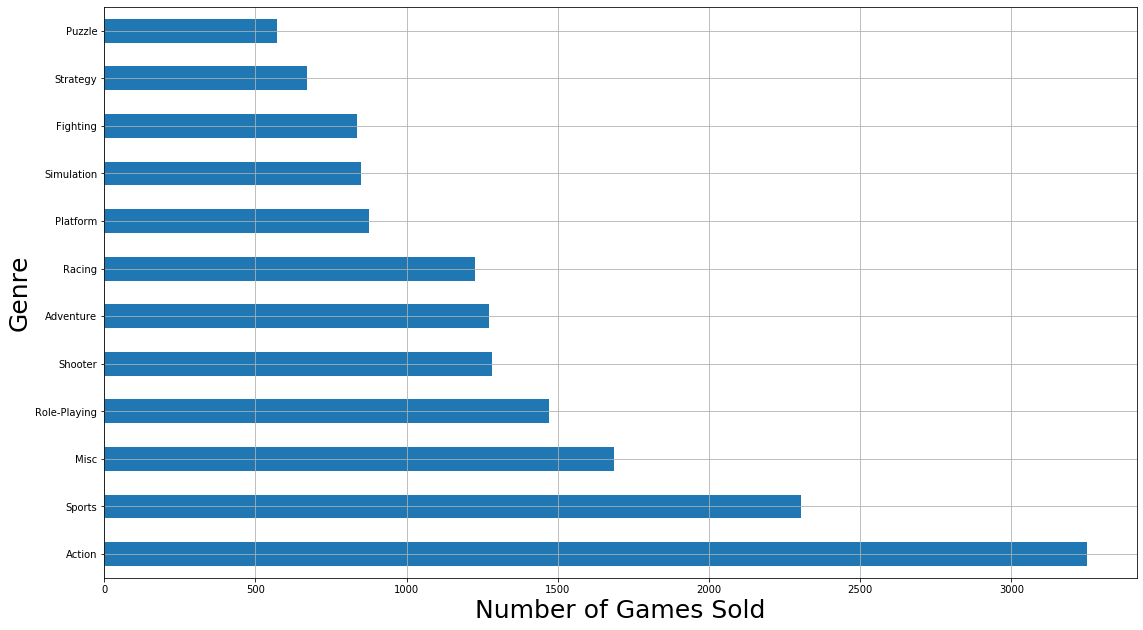

In [6]:
#Finding most popular Genre
df['Genre'].value_counts().plot(kind='barh', grid=True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Number of Games Sold', fontsize=25)
plt.ylabel('Genre', fontsize=25)

In [7]:
#Action is the most popular Genre

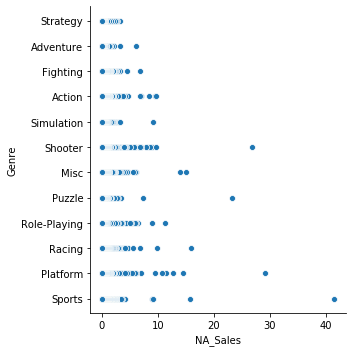

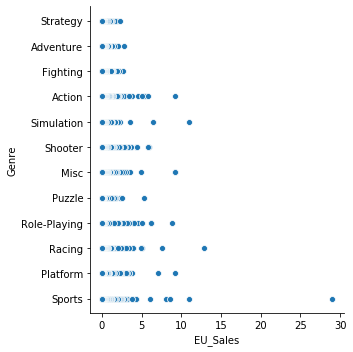

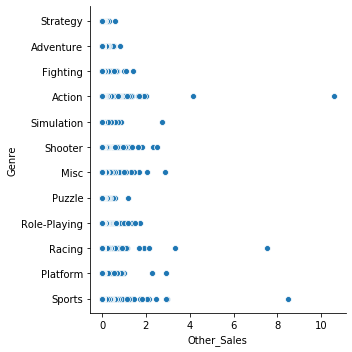

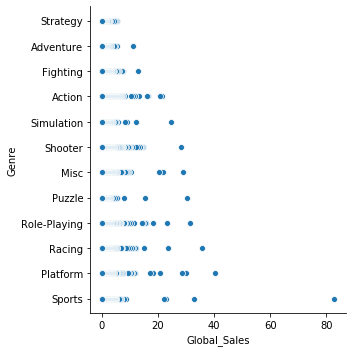

In [8]:
## Comparing sales across the different Genres
sb.relplot(x="NA_Sales", y="Genre", data=df);
#plt.savefig('NA_Sales.png')
sb.relplot(x="EU_Sales", y="Genre", data=df);
#plt.savefig('EU_Sales.png')
sb.relplot(x="Other_Sales", y="Genre", data=df);
#plt.savefig('Other_Sales.png')
sb.relplot(x="Global_Sales", y="Genre", data=df);
#plt.savefig('Global_Sales.png')

In [9]:
#Even though action is the most popular genre, from the graphs we can see that sports have the highest amount of sales
#In each graph, Sports has one massive outlier
#So, let's keep digging and figure out what that outlier is

In [10]:
#Digging into sports 
df_Sports = df.loc[df['Genre']=="Sports"]
df_Sports

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
85,86,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,Sega,2.58,3.90,0.66,0.91,8.06
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
117,118,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
121,122,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
124,125,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.59


In [11]:
#That one outlier is Wii Sports

Text(0, 0.5, 'Platform')

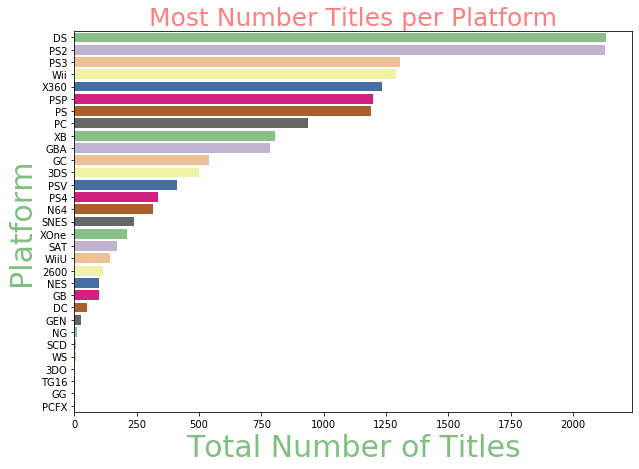

In [12]:
platform_title = df.Platform.value_counts(sort=True)
plt.subplots(figsize=(10,7))
ax = sb.barplot(x=platform_title , y=platform_title .index, palette='Accent')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Number of Titles', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

Text(0, 0.5, 'Platform')

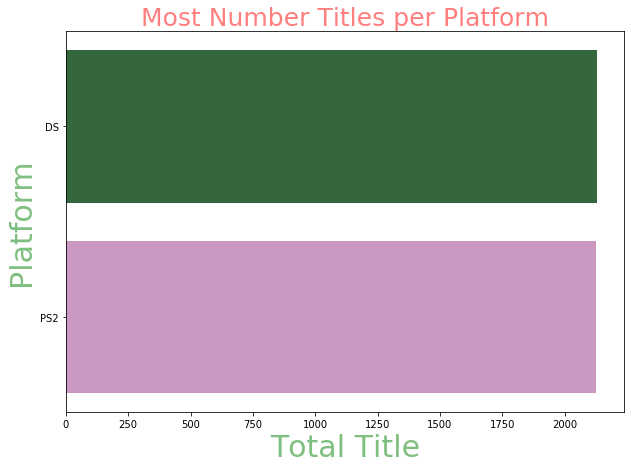

In [13]:
platform_title = df.Platform.value_counts(sort=True)[:2]
plt.subplots(figsize=(10,7))
ax = sb.barplot(x=platform_title , y=platform_title .index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='red', alpha=0.5, size=25)
ax.set_xlabel('Total Title', color='green', alpha=0.5, size=30)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=30)

In [14]:
#PS2 and DS seem to be the most popular platforms (they have roughly the same number of titles)

In [15]:
#Let's see which one sells better

Text(0, 0.5, 'Sales')

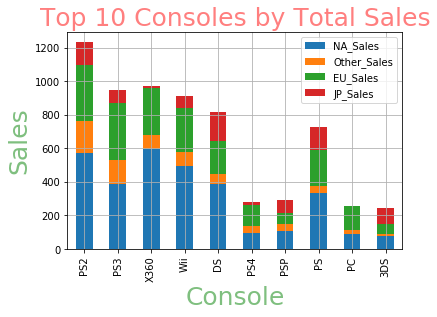

In [16]:
global_pub = df.pivot_table(index=['Platform'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'],
                                          aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_pub = global_pub[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_pub.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Consoles by Total Sales', size=25, color='red', alpha=0.5)
ax.set_xlabel('Console', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

In [17]:
#PS2 sells better

In [18]:
#Since PS2 has the most sales, does that mean Sony (the Publisher of PS2) is the best publisher in terms of sales?

Text(0, 0.5, 'Sales')

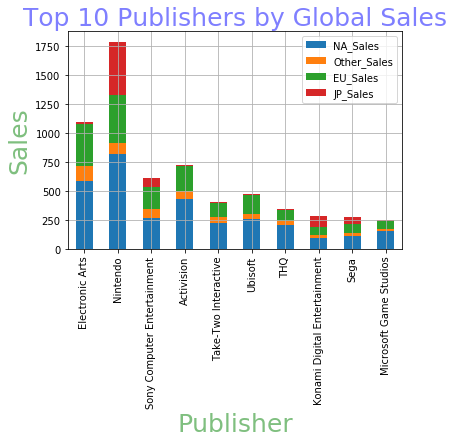

In [19]:
global_sales_publisher = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 10 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

In [20]:
#Even though PS2 sells better than DS, Nintendo has higher sales than Sony. Why?

In [21]:
#Nintendo has a high proportion of Japan Sales compared to the other Publishers

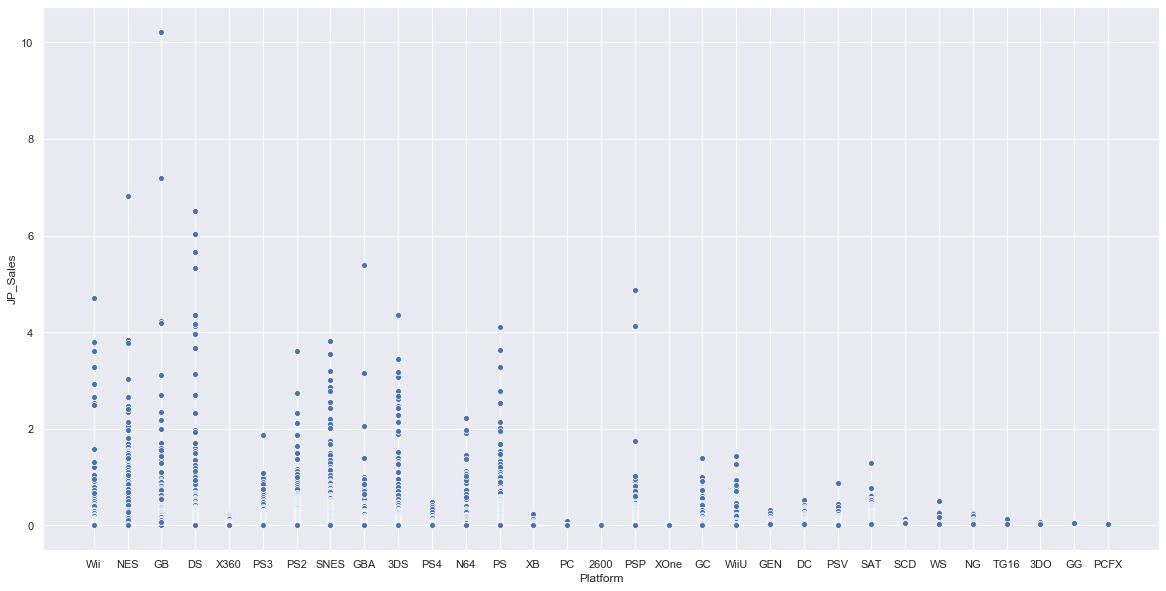

In [22]:
sb.set(rc={'figure.figsize':(20,10)})
sb.scatterplot(x ='Platform', y ='JP_Sales', data = df)

In [23]:
#GB seems to have one outlier, with a sales value drastically larger than the others

In [24]:
df_GB = df.loc[df['Platform']=="GB"]

In [25]:
df_GB.sort_values(['Global_Sales'], ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
50,51,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
132,133,Pokémon Crystal Version,GB,2000.0,Role-Playing,Nintendo,2.55,1.56,1.29,0.99,6.39
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34
171,172,Pokemon Pinball,GB,1999.0,Misc,Nintendo,3.02,1.12,1.01,0.16,5.31
184,185,Super Mario Land 3: Wario Land,GB,1994.0,Platform,Nintendo,2.49,0.98,1.57,0.15,5.19


In [26]:
#That one outlier is Pokemon Red/Blue

Text(0, 0.5, 'Sales')

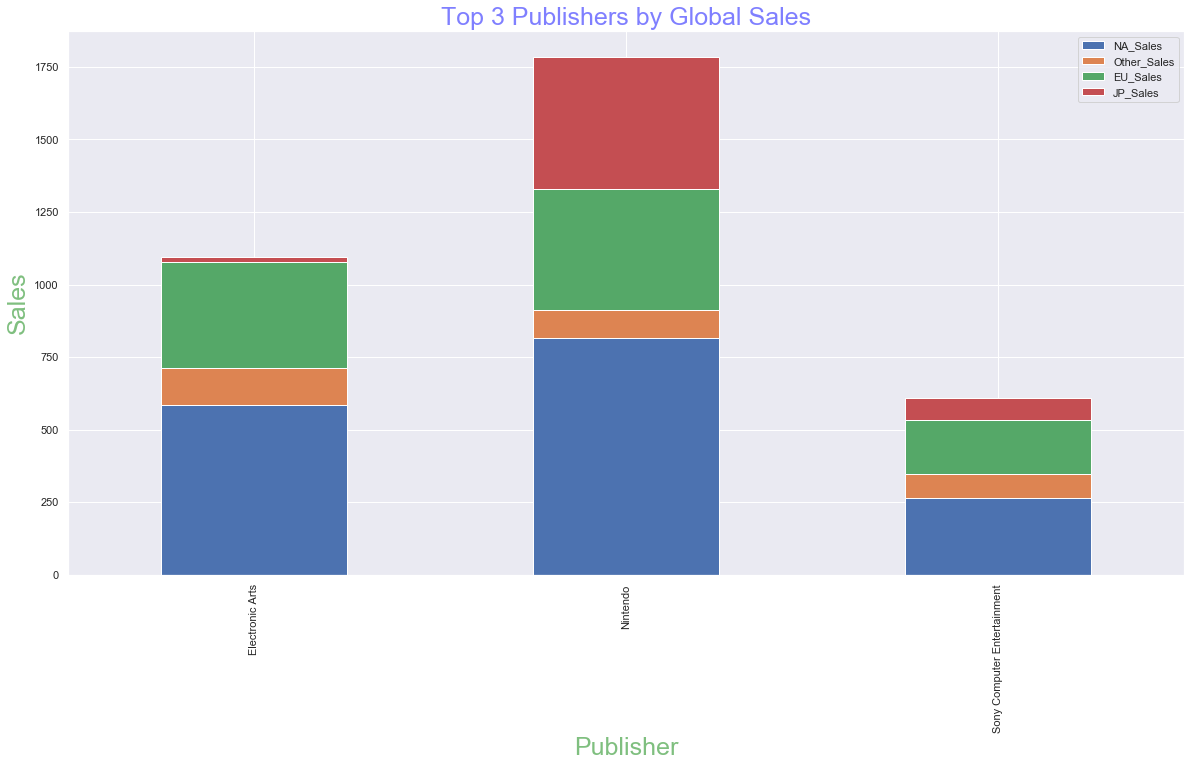

In [27]:
global_sales_publisher = df.pivot_table(index=['Publisher'], values=['Other_Sales','NA_Sales','EU_Sales','JP_Sales'], 
                                           aggfunc=np.sum).sort_values(['Other_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','Other_Sales','EU_Sales','JP_Sales']]
ax = global_sales_publisher.iloc[0:3,:].plot(kind='bar', stacked=True, grid=True)
ax.set_title('Top 3 Publishers by Global Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)

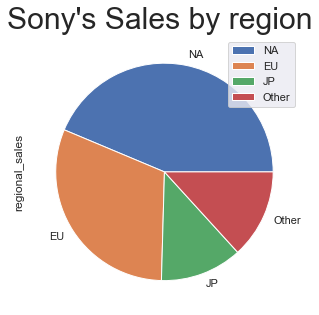

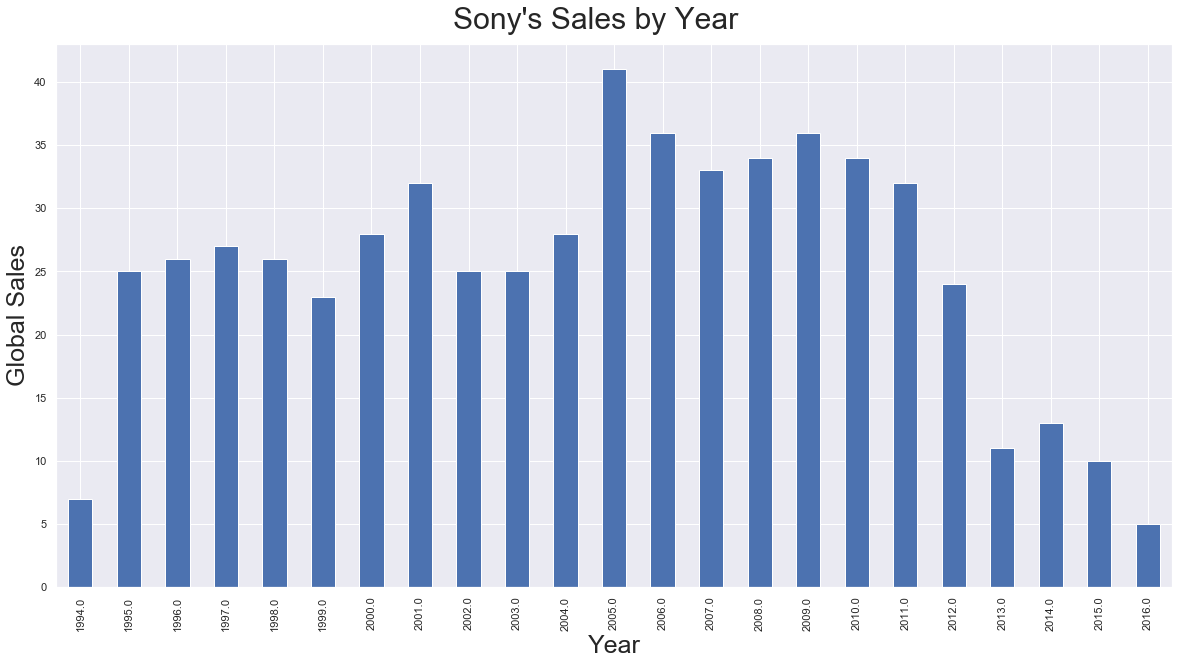

In [28]:
sony = df.loc[df['Publisher']=="Sony Computer Entertainment"]
na_sales_sum=sony['NA_Sales'].sum()
eu_sales_sum=sony['EU_Sales'].sum()
jp_sales_sum=sony['JP_Sales'].sum()
other_sales_sum=sony['Other_Sales'].sum()
total_sales_sum=sony['Global_Sales'].sum()
type(na_sales_sum)
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.figtext(.5,.9,"Sony's Sales by region", fontsize=30, ha='center')
plt.show()
sales_per_year = sony.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Global Sales', fontsize=25)
plt.figtext(.5,.9,"Sony's Sales by Year", fontsize=30, ha='center')
plt.show()

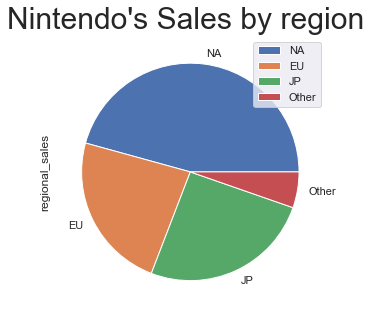

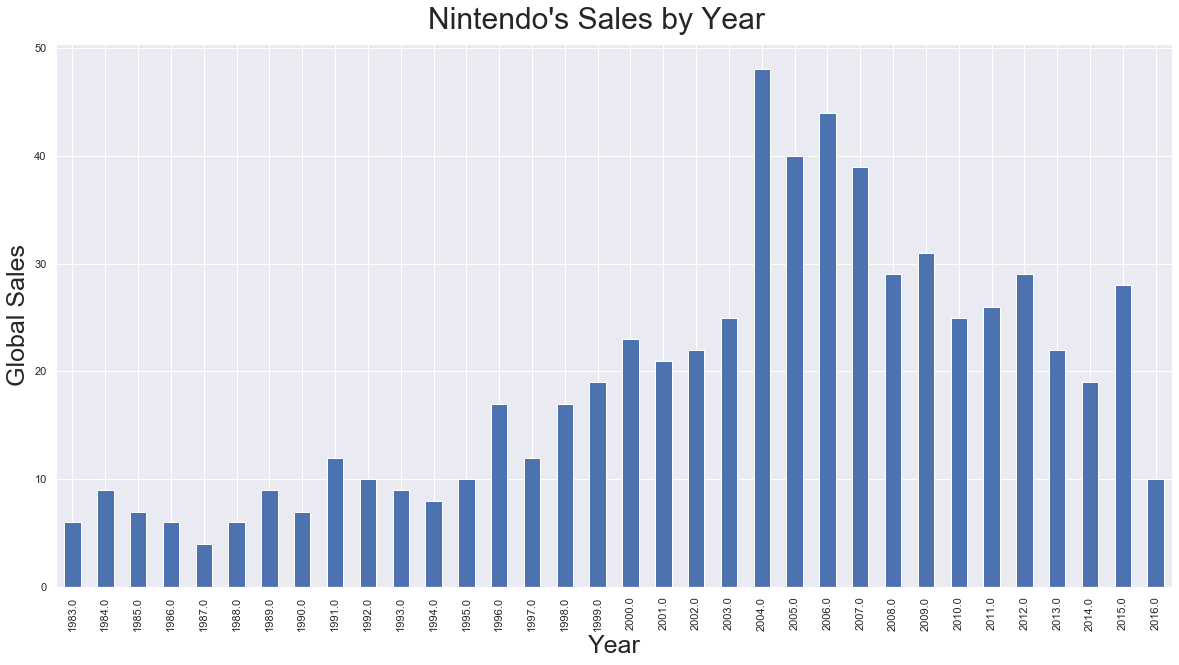

In [29]:
nintendo=df.loc[df['Publisher']=="Nintendo"]
na_sales_sum=nintendo['NA_Sales'].sum()
eu_sales_sum=nintendo['EU_Sales'].sum()
jp_sales_sum=nintendo['JP_Sales'].sum()
other_sales_sum=nintendo['Other_Sales'].sum()
total_sales_sum=nintendo['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.figtext(.5,.9,"Nintendo's Sales by region", fontsize=30, ha='center')
plt.show()
sales_per_year = nintendo.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Global Sales', fontsize=25)
plt.figtext(.5,.9,"Nintendo's Sales by Year", fontsize=30, ha='center')
plt.show()

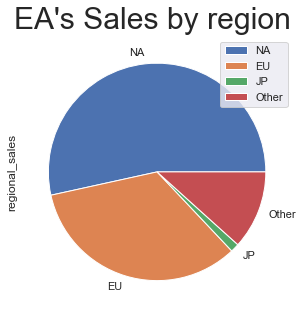

Text(0, 0.5, 'Global Sales')

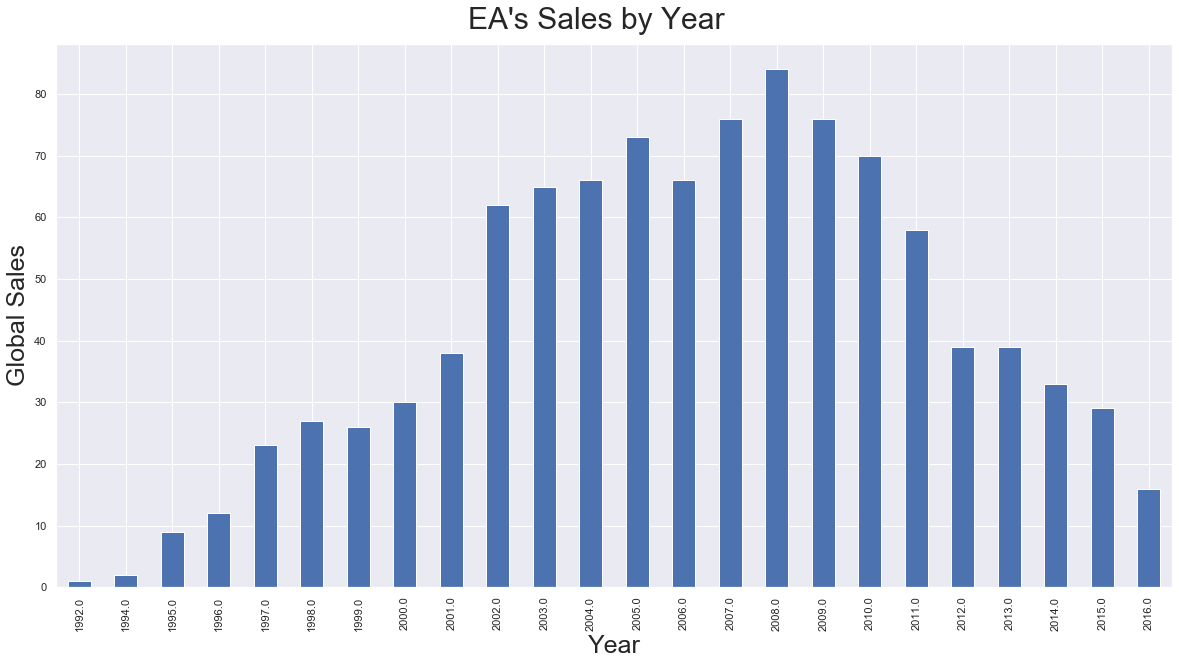

In [30]:
ea=df.loc[df['Publisher']=="Electronic Arts"]
na_sales_sum=ea['NA_Sales'].sum()
eu_sales_sum=ea['EU_Sales'].sum()
jp_sales_sum=ea['JP_Sales'].sum()
other_sales_sum=ea['Other_Sales'].sum()
total_sales_sum=ea['Global_Sales'].sum()
pie_df=pd.DataFrame({'regional_sales':[na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum]},index=['NA','EU','JP','Other']);
plot = pie_df.plot.pie(y='regional_sales', figsize=(5, 5))
plt.figtext(.5,.9,"EA's Sales by region", fontsize=30, ha='center')
plt.show()
sales_per_year = ea.groupby('Year')['Global_Sales'].nunique().plot(kind='bar')
plt.figtext(.5,.9,"EA's Sales by Year", fontsize=30, ha='center')
plt.xlabel('Year', fontsize=25)
plt.ylabel('Global Sales', fontsize=25)

In [31]:
#Let's see the relation between Year and Global Sales for Nintendo (as it has the highest amount of sales)

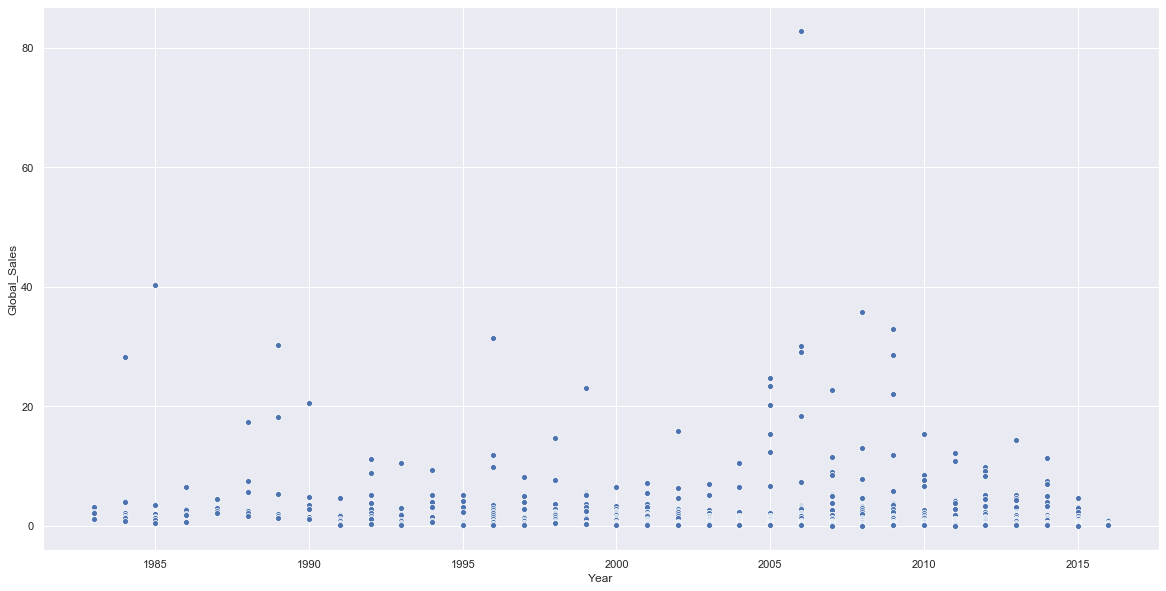

In [32]:
sb.scatterplot(x="Year", y="Global_Sales", data=nintendo)

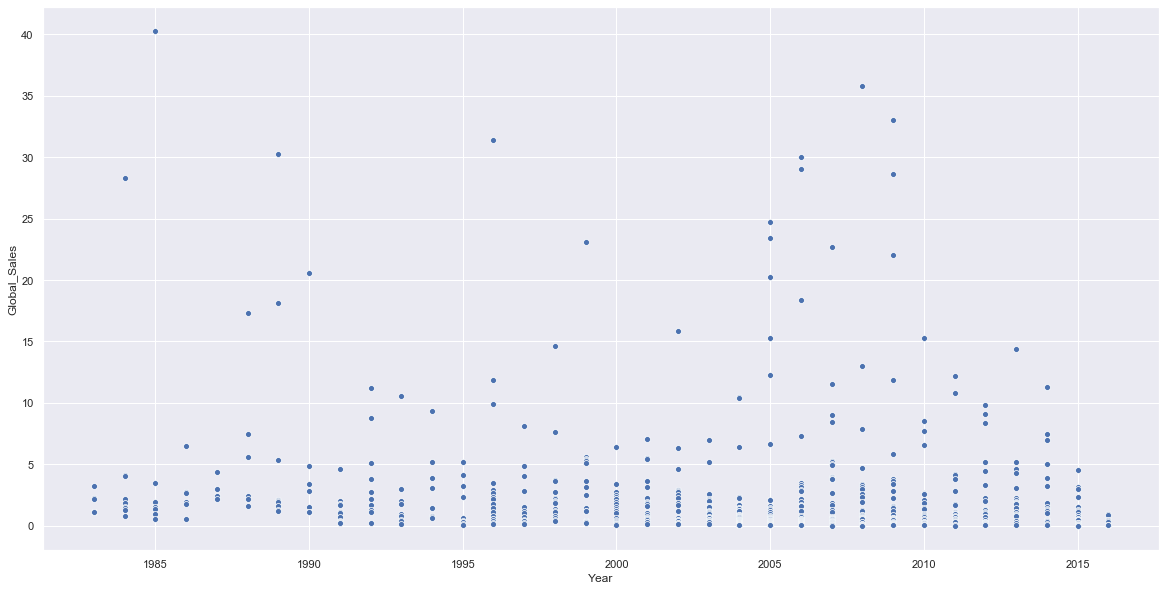

In [33]:
nintendo2=nintendo[nintendo['Name']!='Wii Sports']
nintendo2
sb.scatterplot(x="Year", y="Global_Sales", data=nintendo2)

In [34]:
#Pattern - There is a third variable influencing the relationship between Year and Nintendo's Global Sales

In [ ]:
#Comparing two of our favourite Nintendo Games

In [ ]:
pokemon=nintendo.loc[nintendo['Name'].str.contains('Pokemon')]
pokemon.append(nintendo.loc[nintendo['Name'].str.contains('Pokémon')])
pokemon.sort_values(by='Rank')

In [ ]:
mario=nintendo.loc[nintendo['Name'].str.contains('Mario')]
pokemon.append(nintendo.loc[nintendo['Name'].str.contains('Super Smash Bros')])
mario.sort_values(by='Rank')

In [ ]:
p_sample=pokemon.sample(frac =.25)
m_sample=mario.sample(frac =.25)
from statsmodels.stats import weightstats as stests
#H0: Pokemon and Mario games have equal mean global sales
#H1: Pokemon and Mario games don't have equal mean global sales
ztest ,pval = stests.ztest(p_sample['Global_Sales'], x2=m_sample['Global_Sales'], value=0,alternative='two-sided')
print('P-value: ',float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")